Predicting the labels in MNIST data sets

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Setting training and testing data

train_df = pd.read_csv(r'C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Kaggle Competition\1. Digit\train.csv')
test_df = pd.read_csv(r'C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Kaggle Competition\1. Digit\test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# data size
train_df.shape


(42000, 785)

In [5]:
# Setting the features and label for showing in figures
digits = train_df.drop(['label'], 1).values
digits = digits / 255
label = train_df['label'].values

C:\Users\kkaus\AppData\Local\Temp/ipykernel_23688/3021146447.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  digits = train_df.drop(['label'], 1).values


In [6]:
digits[1]#.shape

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

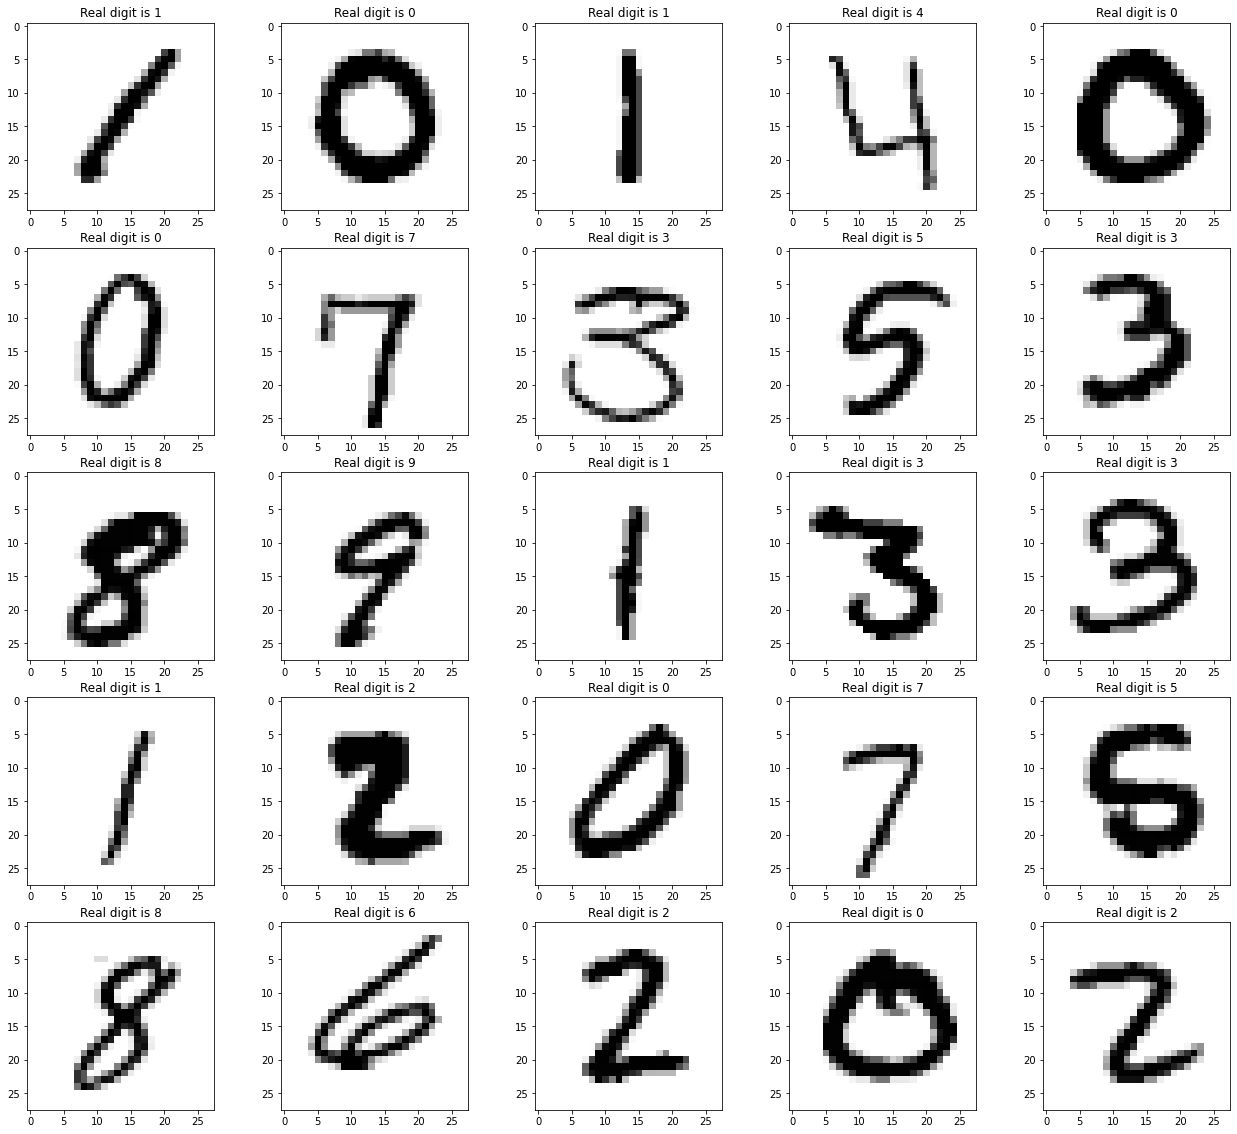

In [7]:
# Show 25 digits of data
fig, axis = plt.subplots(5, 5, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(digits[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(label[i]))



In [8]:
# Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
digits.shape

(42000, 784)

In [11]:
# Setting X, y for fiting
X = digits
y = label
#X_test = test_df.values # file data

In [12]:
#splitting the test data for training and validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Seting our multiple decision tree model
model = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # predict our file test data

In [14]:
# seeing how accurate our model is

print("Model accuracy is: {0:.3f}%".format(accuracy_score(y_test, y_pred) * 100))

Model accuracy is: 94.500%


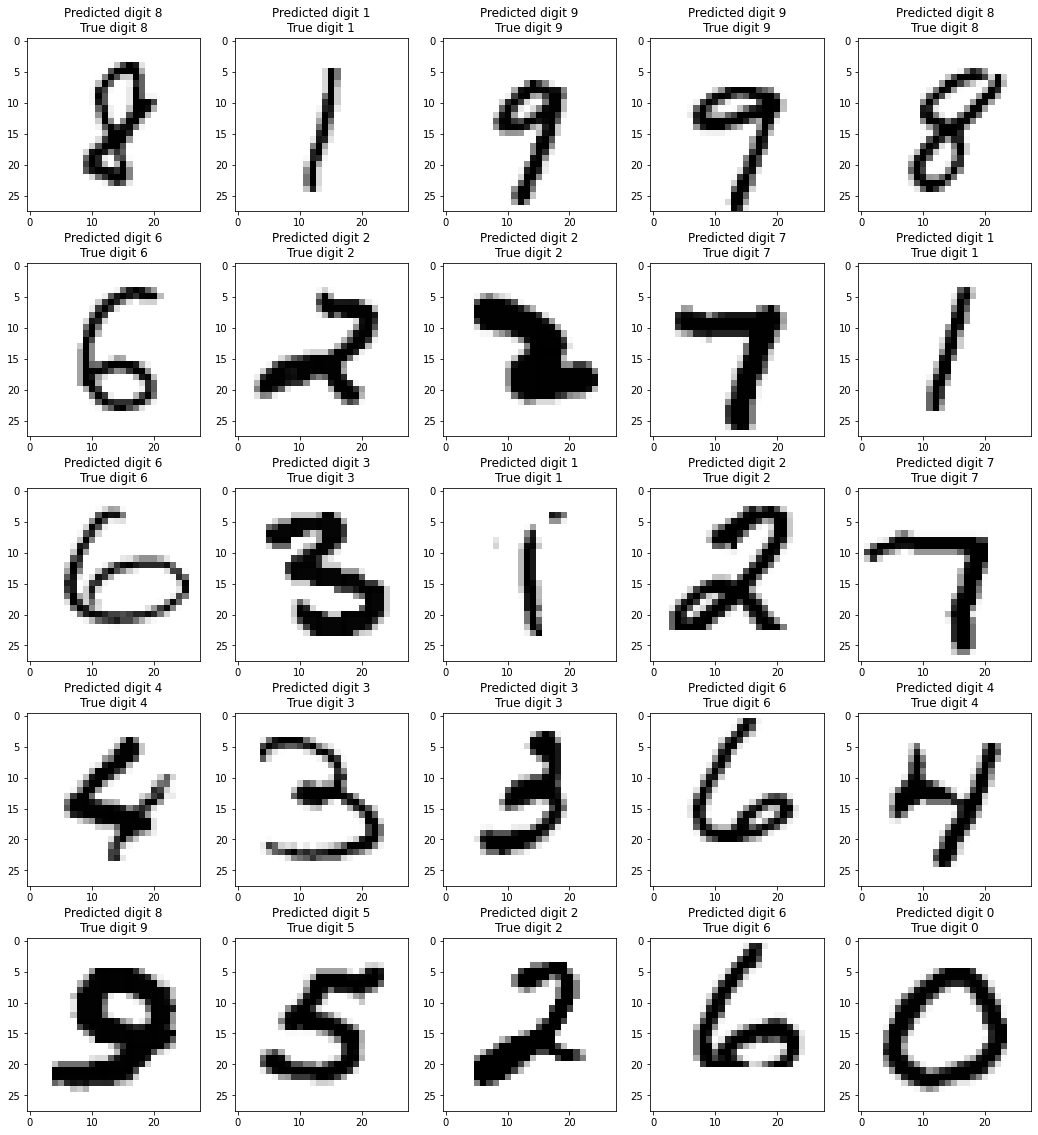

In [15]:
# Comparing our results visually 
fig, axis = plt.subplots(5, 5, figsize=(18, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(y_pred[i], y_test[i]))

In [16]:
test_X = test_df.values
rfc_pred = model.predict(test_X)

In [17]:
sub = pd.read_csv(r'C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Kaggle Competition\1. Digit\sample_submission.csv')
sub.head()

# Make submission file
sub['Label'] = rfc_pred
sub.to_csv('submission.csv', index=False)

In [18]:
# Show our submission file
sub.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
